## Sales Performance Analysis (Project 2, task 2)

### Import libraries


In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = r"D:\Sanjana\Coding practice\Internship_mainflow\superstore.csv" 
df = pd.read_csv(file_path, sep=',') 

In [3]:
# Display the first few rows
print(df.head())

          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  记录数               Order.Date        Order.ID  ... Sales  \
0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813  ...    19   
1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614  ...    19   
2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...    21   
3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...   111   
4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-146969  ...     6   

    Segment                Ship.Date       S

In [6]:
# Inspect the dataset
print("Shape of dataset:", df.shape)


Shape of dataset: (51290, 27)


In [7]:
print("Columns:", df.columns)

Columns: Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')


In [8]:
print("Data types:\n", df.dtypes)

Data types:
 Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount          float64
Market             object
记录数                 int64
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Row.ID              int64
Sales               int64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object


In [9]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


### Data cleaning

#### Handle  missing values

In [12]:
# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [13]:
# Fill missing categorical values with a placeholder
df.fillna("Unknown", inplace=True)


In [14]:
# Confirm no missing values remain
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


#### Remove duplicates

In [15]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)
print("Dataset shape after removing duplicates:", df.shape)

Number of duplicate rows: 0
Dataset shape after removing duplicates: (51290, 27)


#### Fill missing values with strategies like the mean or median

In [16]:
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Profit'] = df['Profit'].fillna(df['Profit'].mean())
df['Discount'] = df['Discount'].fillna(df['Discount'].mean())

#### Convert the Date column to a datetime object (Trend analysis)


In [20]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'], errors='coerce')
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'], errors='coerce')


# Check the cleaned dataset
print("Dataset after cleaning:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        51290 non-null  object        
 1   City            51290 non-null  object        
 2   Country         51290 non-null  object        
 3   Customer.ID     51290 non-null  object        
 4   Customer.Name   51290 non-null  object        
 5   Discount        51290 non-null  float64       
 6   Market          51290 non-null  object        
 7   记录数             51290 non-null  int64         
 8   Order.Date      51290 non-null  datetime64[ns]
 9   Order.ID        51290 non-null  object        
 10  Order.Priority  51290 non-null  object        
 11  Product.ID      51290 non-null  object        
 12  Product.Name    51290 non-null  object        
 13  Profit          51290 non-null  float64       
 14  Quantity        51290 non-null  int64         
 15  Re

## Exploratory Data Analysis

####  3.1 Plot Time Series Graph for Sales Trend

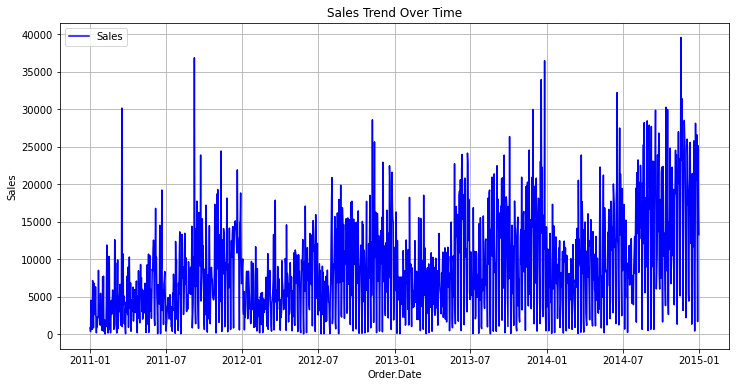

In [27]:
import matplotlib.pyplot as plt

# Aggregate sales by date
sales_trend = df.groupby('Order.Date')['Sales'].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(sales_trend, color='blue', label='Sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Order.Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

#### 3.2 Scatter Plot for Profit vs. Discount

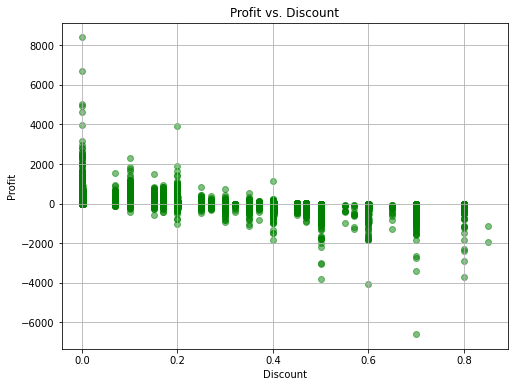

In [30]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Discount'], df['Profit'], alpha=0.5, color='green')
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid()
plt.show()


#### 3.3 Visualize Sales Distribution by Region and Category

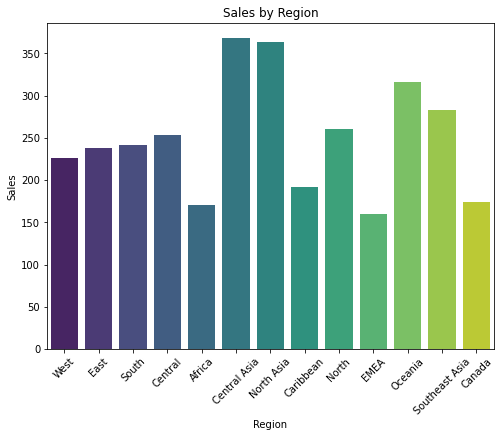

In [35]:
import seaborn as sns

# Bar plot for sales by region
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Sales', data=df, errorbar=None, palette='viridis')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

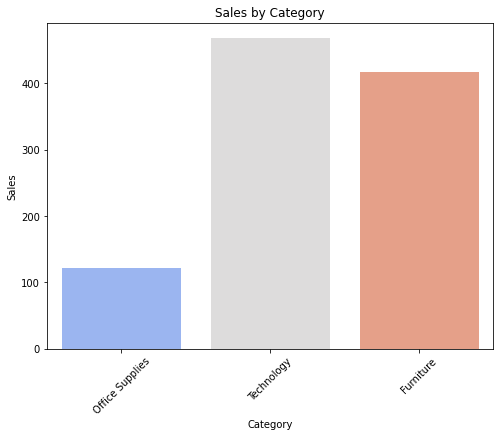

In [37]:
# Bar plot for sales by category
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Sales', data=df, errorbar=None, palette='coolwarm')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

## 4. Predictive Modeling

In [38]:
#4.1 Prepare Data for Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
features = df[['Profit', 'Discount']]
target = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [39]:
#4.2 Train Linear Regression Model
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 241642.61630233377
R2 Score: 0.11428823787896547


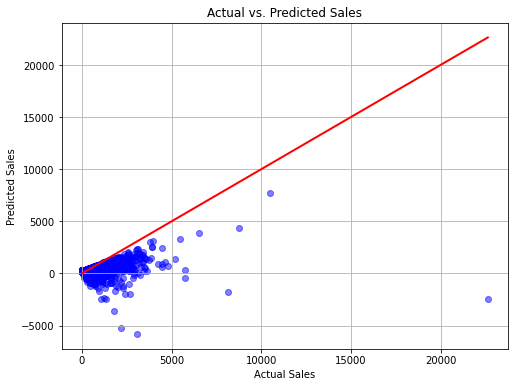

In [40]:
#4.3 Visualize Actual vs. Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid()
plt.show()
